**Top-Rated Movies Loved by Millions — A Global Ranking of Cinema Excellence**

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# UPLOADING DATASET

df = pd.read_csv('/content/drive/MyDrive/Data analysis projects/tmdb_top_rated_movies.csv')

df.head()

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count
0,278,en,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,35.0440,8.708,28176
1,238,en,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,The Godfather,36.3040,8.687,21363
2,240,en,In the continuing saga of the Corleone crime f...,1974-12-20,The Godfather Part II,17.2441,8.570,12910
3,424,en,The true story of how businessman Oskar Schind...,1993-12-15,Schindler's List,37.5490,8.564,16380
4,389,en,The defense and the prosecution have rested an...,1957-04-10,12 Angry Men,17.0033,8.548,9091


In [4]:
df.describe()

,id,popularity,vote_average,vote_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,2.070686e+05,5.864129,6.652452,2015.950900
std,2.732769e+05,10.399510,0.741678,3215.961515
min,2.000000e+00,0.007500,4.583000,300.000000
25%,1.028450e+04,2.353925,6.126000,467.000000
50%,3.921850e+04,4.009800,6.669000,845.000000
75%,3.772632e+05,6.624200,7.200000,1999.250000
max,1.356039e+06,517.542500,8.708000,37385.000000


In [7]:
df.shape

(10000, 8)

In [5]:
# checking for nulls

df.isnull().sum()

,0
id,0
original_language,0
overview,0
release_date,2
title,0
popularity,0
vote_average,0
vote_count,0


In [8]:
# showing rows with null values in release date

df[df['release_date'].isnull()]

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count
5424,1198870,en,A girl is at school. Suddenly it's as if she c...,NaN,Return,0.4648,6.577,402
5515,733668,hy,Eyüp decides to cross mount Ararat looking for...,NaN,Return,0.2319,6.557,392


In [9]:
# check for rows whose title is "Return"

df[df['title'] == 'Return']

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count
3138,357953,en,Return is a methodical construction of the app...,1975-09-04,Return,2.2980,7.046,549
3169,357953,en,Return is a methodical construction of the app...,1975-09-04,Return,2.2980,7.043,550
5043,464446,en,A young man returns home for the weekend to di...,2015-07-04,Return,0.5358,6.655,589
5058,839321,pl,Polish animator Anna Błaszczyk’s humorous shor...,2008-01-01,Return,0.2448,6.653,582
5424,1198870,en,A girl is at school. Suddenly it's as if she c...,NaN,Return,0.4648,6.577,402
5442,320367,en,A tale of terror. Cathy Reed has been institut...,2015-01-01,Return,0.3321,6.573,1108
5515,733668,hy,Eyüp decides to cross mount Ararat looking for...,NaN,Return,0.2319,6.557,392
5535,348877,en,Static images of an old country house are comb...,1972-07-15,Return,0.3948,6.554,389
5883,670355,en,"Owen, a young man is dissatisfied with his lif...",2020-01-28,Return,0.1368,6.481,590
6076,379862,en,A young couple purchase their new home to star...,2015-11-28,Return,0.5872,6.444,904


In [13]:
# droping rows whose release_date columns are null

df.dropna(subset=['release_date'], inplace=True)

In [14]:
df.isnull().sum()

,0
id,0
original_language,0
overview,0
release_date,0
title,0
popularity,0
vote_average,0
vote_count,0


**EDA**

In [17]:
# extracting year from release date to create the release year column

df['release_year'] = pd.to_datetime(df['release_date']).dt.year

df.head()

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count,release_year
0,278,en,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,35.0440,8.708,28176,1994
1,238,en,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,The Godfather,36.3040,8.687,21363,1972
2,240,en,In the continuing saga of the Corleone crime f...,1974-12-20,The Godfather Part II,17.2441,8.570,12910,1974
3,424,en,The true story of how businessman Oskar Schind...,1993-12-15,Schindler's List,37.5490,8.564,16380,1993
4,389,en,The defense and the prosecution have rested an...,1957-04-10,12 Angry Men,17.0033,8.548,9091,1957


In [18]:
# checking which release dates/ years had the highest ratings

df.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)

,vote_average
release_year,
1921,7.981500
1924,7.925500
1920,7.923000
1926,7.921500
1902,7.900000
...,...
2008,6.460092
2015,6.454938
2011,6.441854


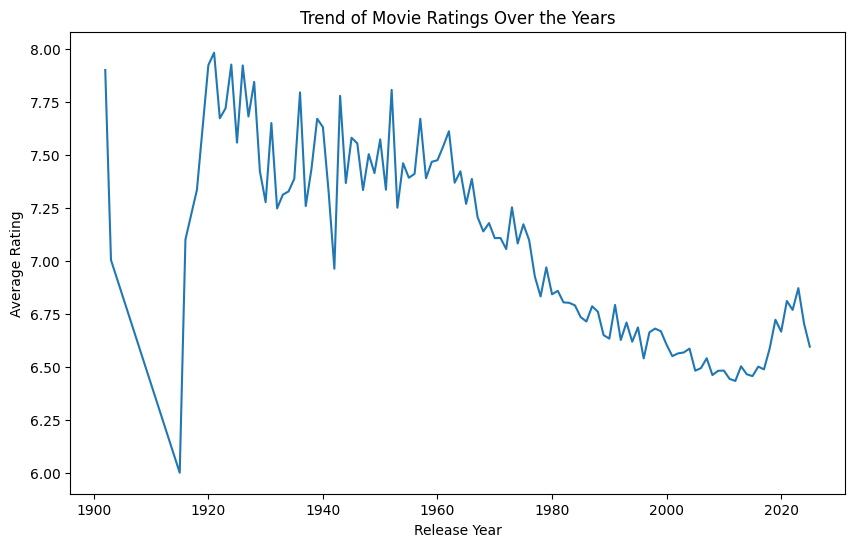

In [19]:
# checking the trend of movie ratings over the years using line graph

df.groupby('release_year')['vote_average'].mean().plot(kind='line', figsize=(10, 6))

plt.title('Trend of Movie Ratings Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')

plt.show()

In [20]:
# checking for duplicate id

df[df['id'].duplicated()]

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count,release_year
462,25538,zh,Each member of a family in Taipei asks hard qu...,2000-09-20,Yi Yi,2.4363,7.885,558,2000
840,675,en,Returning for his fifth year of study at Hogwa...,2007-07-08,Harry Potter and the Order of the Phoenix,26.8321,7.674,19841,2007
1120,246741,en,Vampire housemates try to cope with the comple...,2014-06-19,What We Do in the Shadows,3.5137,7.559,3634,2014
1204,9056,cn,Officer Chan Ka Kui manages to put a major Hon...,1985-12-14,Police Story,5.3411,7.500,917,1985
1220,982,en,"Near the end of the Korean War, a platoon of U...",1962-10-24,The Manchurian Candidate,4.8293,7.500,734,1962
...,...,...,...,...,...,...,...,...,...
9881,323262,en,An anthology feature film that puts a uniquely...,2016-04-22,Holidays,3.7467,4.950,496,2016
9940,412547,en,A group of eccentric assassins are fed up with...,2017-09-22,Killing Gunther,4.6052,4.779,405,2017
9941,803114,en,A couple on a romantic getaway find themselves...,2022-01-28,The Requin,3.9076,4.800,344,2022
9980,12095,en,A bank-robbing gang of misfits heads to Mexico...,1999-03-16,From Dusk Till Dawn 2: Texas Blood Money,1.6833,4.631,478,1999


In [21]:
# droping duplicated rows in the id column

df.drop_duplicates(subset='id', inplace=True)

In [24]:
df.shape


(9771, 9)

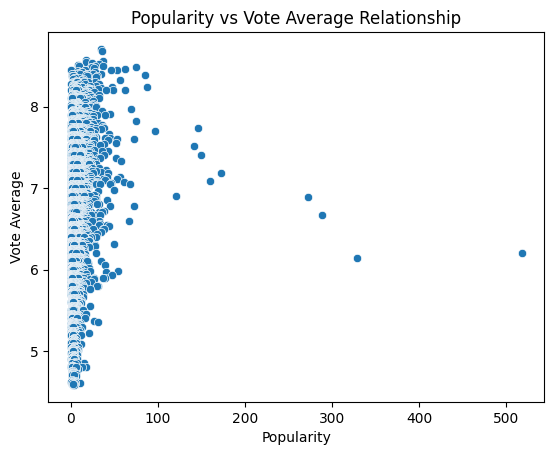

In [25]:
# Popularity vs Vote Average Relationship

sns.scatterplot(data=df, x='popularity', y='vote_average')

plt.title('Popularity vs Vote Average Relationship')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')

plt.show()

**MODELING PHASE**

**Content-Based Filtering (Overview Similarity)**

In [27]:
# Importing libraries for content based filtering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [28]:
# text processing

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])


In [29]:
# cosine similarity

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [32]:
# building the recommendation model

# Reset index to access movie titles by index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 recommendations
    movie_indices = [i[0] for i in sim_scores]
    # Corrected the variable name from df_indices to movie_indices
    return df['title'].iloc[movie_indices]

In [33]:
get_recommendations("Schindler's List")

,title
2194,Everything Is Illuminated
3588,Resistance
3649,The Tin Drum
3977,The Railway Man
4073,Defiance
2042,Woman in Gold
2702,A Hidden Life
2342,The Last Metro
4951,Blood & Gold
110,Inglourious Basterds
